In [1]:
#Import necessary libraries 
import pandas as pd
import numpy as np

In [2]:
#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [3]:
#Read file and set to dataframe 
yelp = pd.read_csv('yelp.csv')

In [4]:
#Let's breifly explore the data now!
#I won't be dropping any columns, but right away we can see that there are a few that won't be needed for the purpose of this project. Such as 'business_id' and 'type
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [5]:
#Considering the memory usage, there is a substaintial amount of data to work with at 10,000 entries
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
#In order to detect how long the reviews are, I will be creating a new column for txt length 
yelp['text length'] = yelp['text'].apply(len)
#double check it has been successful created 
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


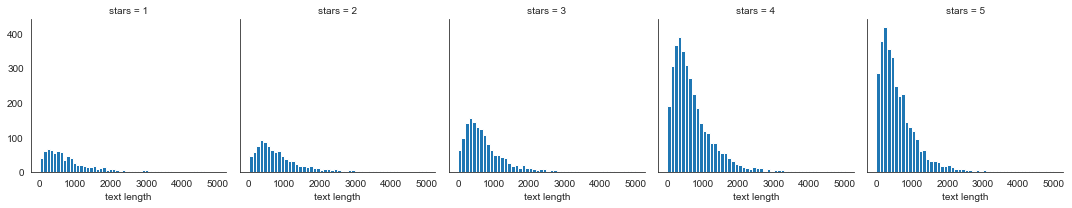

In [8]:
#Now that we have a feel of the data we are working with, we can stare doing exploratory data analysis !
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=50)
#the distribution of text length seems to be the same for all the # of stars, however the amount of actual text reviews are skewed towards 4/5 stars

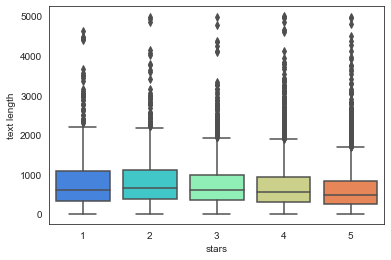

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')
#Although textlength seem to be higher for 1-2 stars, the amount of outliers lower the signifiance of text length as a feature

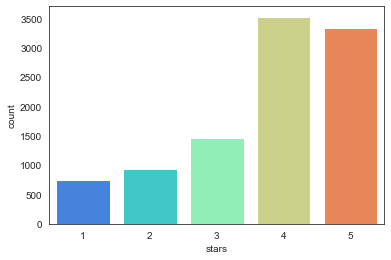

In [10]:
sns.countplot(x='stars', data=yelp, palette='rainbow')
#This dataset has more favorable reviews generally 

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


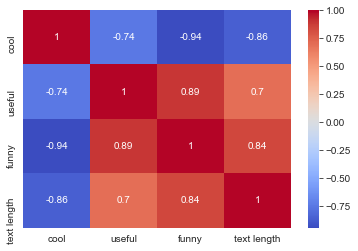

In [13]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)
#funny highly correlated to useful 
#useful correlated with text length 
#neg corr between cool, text length funny and useful 

In [14]:
#NLP Classfication task

In [35]:
#To make it simpler, will only deal with 1 or 5 star reviews
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [36]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [37]:
#Creating feature and target variables 
X = yelp_class['text']
y = yelp_class['stars']


In [38]:
# Now, in order to convert each message, represented as a list of tokens (lemmas) above, we must convert them into a vector that machine learning models can understand
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [39]:
X = cv.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [42]:
# import MultinomialNV to create instance of estimator 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [43]:
#Fit nb to training data
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
#Lets see how our model did 
predictions = nb.predict(X_test)

In [45]:
#Create a confusion matrix and classification report to see results 
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



Just based on reading the text data alone, our model generates  approximately 90% accuracy, precision and recall rate.
Now, lets include TF-IDF (term frequency-inverse document frequency) to see if it has much of an affect

In [47]:
#import 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [51]:
#create a pipeline 
pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                  ('model',MultinomialNB())])

In [53]:
#pipeline already includes all pre-process steps - so data must be re-split 
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)


In [54]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [55]:
predictions = pipe.predict(X_test)

In [56]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Users/christykoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems that tfidf made the model perform worse. A reason could be due to the special syntax of text messages, term frequency is not a significant factor